# Partial Dependence Plots

In [149]:
# imports
import pandas as pd
import numpy as np
import matplotlib as plt
from sklearn.inspection import PartialDependenceDisplay, partial_dependence
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import linear_model

# Samples per day of rented bikes
day = pd.read_csv("./datasets/bike_sharing_dataset/day.csv", delimiter=',')
day['temp'] = day['temp'] * 41 # Return from normalized value (divided by 41)
day['atemp'] *= 50 # Return from normalized value (divided by 50)

# Samples per hour of rented bikes
#hour = pd.read_csv("./datasets/bike_sharing_dataset/hour.csv", delimiter=',')

1) Fit a model to predict rented bikes or risk of cervical cancer and analyze partial dependencies
(https://scikit-learn.org/stable/modules/partial_dependence.html).
See book chapter 3 on how to get access to the datasets.

In [150]:
X = day.drop(["cnt", "instant", "dteday", "casual", "registered"], axis=1)
y = day["cnt"].copy()

#print(y.sort_values(ascending=False))
print(y.mean)
mod = linear_model.LinearRegression()
mod.fit(X, y)
print(mod.coef_)

<bound method Series.mean of 0       985
1       801
2      1349
3      1562
4      1600
       ... 
726    2114
727    3095
728    1341
729    1796
730    2729
Name: cnt, Length: 731, dtype: int64>
[  509.77519829  2040.70340166   -38.97956441  -518.99193125
    69.0622163    120.35698921  -610.98700811    49.48575862
    71.46548577 -1018.86157122 -2557.56913787]


We fit the regressor to our X, y dataset and set the features to be:
7 - Temperature
9 - Humidity
10- Windspeedlt,

In [151]:
X = day.drop(["cnt", "instant", "dteday", "casual", "registered"], axis=1)
y = day["cnt"].copy()

mod = linear_model.LinearRegression()
mod.fit(X, y)
print(mod.coef_)

[  509.77519829  2040.70340166   -38.97956441  -518.99193125
    69.0622163    120.35698921  -610.98700811    49.48575862
    71.46548577 -1018.86157122 -2557.56913787]


Next we make a black box model with HistGradientBoostingRegressor

In [152]:
X = day.drop(["cnt", "instant", "dteday", "casual", "registered"], axis=1)
y = day["cnt"].copy()

model_1 = GradientBoostingRegressor(learning_rate=1.0,max_depth=1,random_state=0).fit(X, y)
features = [i for i in range(0,10)]

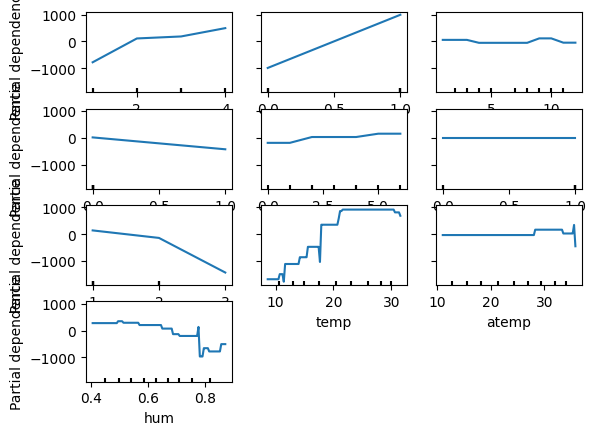

In [153]:
# plot the PDP and heat map of two-way feature dependence
PartialDependenceDisplay.from_estimator(model_1, X, features)


We made a one-way PDP on atemp (feeling temp) and on temperature.
We see:
- 